In [69]:
# importing part of libraries into the project
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [70]:
#importing part of libraries into the project
import re
import nltk
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jahna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
# Dataset implementation part
df = pd.read_csv("labeled_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [72]:
# converting categorical to numerical
df['labels'] = df['class'].map({0:"Hate Speech Detected", 1:"Offensive language detected", 2:"No hate and offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No hate and offensive speech  
1   Offensive language detected  
2   Offensive language detected  
3   Offensive language detected  
4   Offensive language detected  


In [73]:
# dropping the unwanted features
df = df[['tweet', 'labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected


In [74]:
df.shape

(24783, 2)

In [75]:
# clearing the punctuations in the text
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub('https?://\s+|www\.\s+', '', text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*', '',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text
df['tweet']= df['tweet'].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolovely woman shouldnt complain clean...   
1   rt  boy dats coldtyga dwn bad cuffin dat hoe ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3           rt cganderson vivabased look like tranny   
4   rt shenikaroberts shit hear might true might ...   

                         labels  
0  No hate and offensive speech  
1   Offensive language detected  
2   Offensive language detected  
3   Offensive language detected  
4   Offensive language detected  


In [76]:
# describing the variables in the dataset
df.describe()

,tweet,labels
count,24783,24783
unique,24627,3
top,bitch,Offensive language detected
freq,11,19190


In [77]:
# this line is used to get the information about the dataset
df.info

<bound method DataFrame.info of                                                    tweet  \
0       rt mayasolovely woman shouldnt complain clean...   
1       rt  boy dats coldtyga dwn bad cuffin dat hoe ...   
2       rt urkindofbrand dawg rt  ever fuck bitch sta...   
3               rt cganderson vivabased look like tranny   
4       rt shenikaroberts shit hear might true might ...   
...                                                  ...   
24778  yous muthafin lie   coreyemanuel right tl tras...   
24779  youve gone broke wrong heart baby drove rednec...   
24780  young buck wanna eat dat nigguh like aint fuck...   
24781                  youu got wild bitches tellin lies   
24782  ruffled  ntac eileen dahlia  beautiful color c...   

                             labels  
0      No hate and offensive speech  
1       Offensive language detected  
2       Offensive language detected  
3       Offensive language detected  
4       Offensive language detected  
...                

In [78]:
#count the number of varible in this target a value
df['labels'].groupby(df['labels']).count()


labels
Hate Speech Detected             1430
No hate and offensive speech     4163
Offensive language detected     19190
Name: labels, dtype: int64

In [79]:
#Checking the null values
df.isnull()

,tweet,labels
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24778,False,False
24779,False,False
24780,False,False
24781,False,False


In [80]:
#Import the seaborn 
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

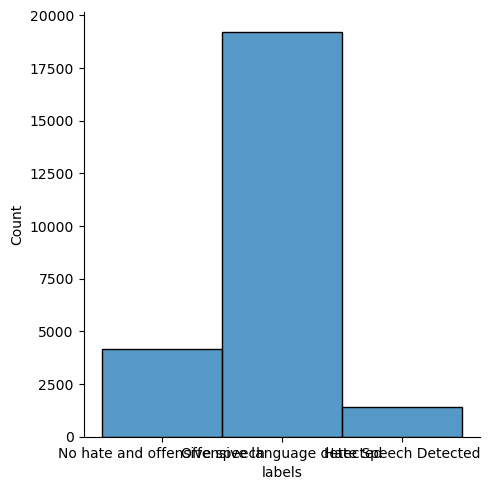

In [81]:
#displot graph
sns.displot(x='labels',data=df)
plt.show

<Axes: xlabel='labels', ylabel='count'>

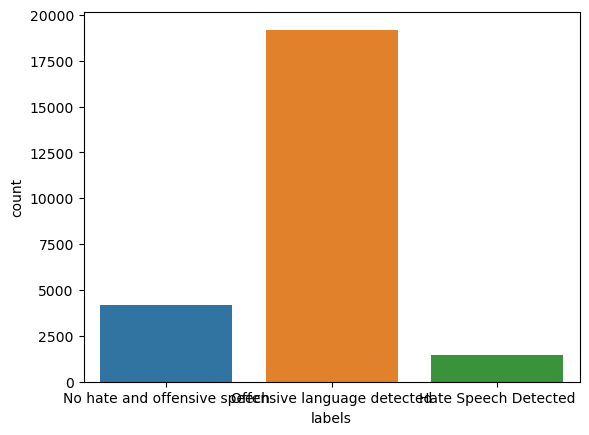

In [82]:
sns.countplot(x="labels", data = df)

In [83]:
#allocate a features and target variable to x and y
x = np.array(df["tweet"])
y = np.array(df["labels"])

In [84]:
print(df.groupby([y]).size())

Hate Speech Detected             1430
No hate and offensive speech     4163
Offensive language detected     19190
dtype: int64


In [85]:
#count vectorizer and transform
cv = CountVectorizer()
x = cv.fit_transform(x)
#Train and test split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
#fetching the predicting x_test to pred_clf
pred_clf = clf.predict(x_test)

In [87]:
#Accuracy for Decision tree
clf.score(x_test,y_test)

0.8725035303611055

In [88]:
#Classification report of Decision tree
print(classification_report(y_test,pred_clf))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.35      0.32      0.33       290
No hate and offensive speech       0.80      0.84      0.82       835
 Offensive language detected       0.93      0.92      0.92      3832

                    accuracy                           0.87      4957
                   macro avg       0.69      0.69      0.69      4957
                weighted avg       0.87      0.87      0.87      4957



In [89]:
#Importing Naive Bayes 
from sklearn.naive_bayes import MultinomialNB

In [90]:
nb= MultinomialNB()

In [91]:
nb.fit(x_train,y_train)

MultinomialNB()

In [92]:
pred_nb = nb.predict(x_test)

In [93]:
#predicting accuracy for naive bayes
nb.score(x_test,y_test)

0.8644341335485173

In [94]:
#classification report for Naive Bayes
print(classification_report(y_test,pred_nb))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.40      0.09      0.14       290
No hate and offensive speech       0.84      0.63      0.72       835
 Offensive language detected       0.88      0.97      0.92      3832

                    accuracy                           0.86      4957
                   macro avg       0.70      0.56      0.60      4957
                weighted avg       0.84      0.86      0.84      4957



In [95]:
#Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
RF = RandomForestClassifier()

In [97]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
pred_RF = RF.predict(x_test)

In [99]:
#Predicting accuracy score for Random Forest
RF.score(x_test,y_test)

0.8870284446237644

In [100]:
#Classification report for Random Forest
print(classification_report(y_test,pred_nb))

                              precision    recall  f1-score   support

        Hate Speech Detected       0.40      0.09      0.14       290
No hate and offensive speech       0.84      0.63      0.72       835
 Offensive language detected       0.88      0.97      0.92      3832

                    accuracy                           0.86      4957
                   macro avg       0.70      0.56      0.60      4957
                weighted avg       0.84      0.86      0.84      4957



In [113]:
#Testing the module
test_data = "@FloKid88: As long as the Lakers trash from now on, I could careless. And that's real.. CC: @BENBALLER hahaha"
df = cv.transform([test_data]).toarray()
print(nb.predict(df))
print(RF.predict(df))
print(clf.predict(df))

['No hate and offensive speech']
['No hate and offensive speech']
['No hate and offensive speech']
